In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime as dt
from datetime import timedelta as td

pd.set_option('display.max_columns',None)

# Reading the data


In [37]:
# Reading the datasets

train = pd.read_csv('Hotel-A-train.csv')
test = pd.read_csv('Hotel-A-test.csv')
validation = pd.read_csv('Hotel-A-validation.csv')

# Data Cleaning


In [28]:
columns = list(train.columns)
columns

['Reservation-id',
 'Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Expected_checkin',
 'Expected_checkout',
 'Booking_date',
 'Adults',
 'Children',
 'Babies',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion',
 'Discount_Rate',
 'Room_Rate']

In [29]:
# Checking for null values
null_columns = [col for col in columns if len(train[train[col].isnull()])]
number_null_columns=len(null_columns) 
print(number_null_columns)

0


In [30]:
#checking for duplications
number_data_before_removing_duplicates = len(train)
number_data_before_removing_duplicates = len(train.drop_duplicates())
number_duplicates = number_data_before_removing_duplicates - number_data_before_removing_duplicates
print(number_duplicates)

0


In [31]:
train.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [32]:
train.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

# Data Transformation

In [38]:
def encoding(data,is_train):
    # < Label Encoding and Dummy Encoding >

    #Gender
    G = {'F':1,'M':0}
    data = data.replace({"Gender": G})

    #Ethnicity
    E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
    data = pd.concat([data,pd.get_dummies(data.Ethnicity,prefix='Eth_')],axis=1)

    #Educational_Level
    EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
    data = pd.concat([data,pd.get_dummies(data.Educational_Level,prefix='Ed_L_')],axis=1)

    #Income
    I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
    data = data.replace({"Income": I})

    #Country_region
    CR = {'South':1,'East':2,'West':3,'North':4}
    data = pd.concat([data,pd.get_dummies(data.Country_region,prefix='Country_R_')],axis=1)

    #Hotel_Type
    HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
    data = pd.concat([data,pd.get_dummies(data.Hotel_Type,prefix='Hotel_T_')],axis=1)

    #Meal_Type
    MT = {'HB':1,'FB':2,'BB':3}
    data = pd.concat([data,pd.get_dummies(data.Meal_Type,prefix='Meal_T_')],axis=1)

    #Visted_Previously
    VP = {'Yes':1,'No':0}
    data = data.replace({"Visted_Previously": VP})
    
    data = data.replace({"Required_Car_Parking": VP})
    
    data = data.replace({"Use_Promotion": VP})

    #Previous_Cancellations
    #VP = {'Yes':1,'No':0}
    data = data.replace({"Previous_Cancellations": VP})
    
    if(is_train):
        #Prediction Target -> Reservation_Status
        RS = {'Check-In':1,'Canceled':2,'No-Show':3}
        data = data.replace({"Reservation_Status": RS})
    
    data = data.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)
        
    return data
    

In [39]:
# < Label Encoding and Dummy Encoding >

train = encoding(train,True)
train.head()

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB
0,39428300,1,40,1,7/1/2015,7/2/2015,5/21/2015,2,2,0,0,0,1,1,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,77491756,1,49,3,7/1/2015,7/2/2015,5/26/2015,3,3,0,0,0,1,1,0,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,73747291,1,42,1,7/2/2015,7/6/2015,6/29/2015,3,3,0,0,0,1,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,67301739,0,25,4,7/2/2015,7/3/2015,6/20/2015,4,3,0,0,0,1,1,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,77222321,1,62,2,7/3/2015,7/4/2015,6/20/2015,1,1,0,0,0,0,1,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0


In [40]:
# Groping the age 

def Age_group(x):
    if x<=30:
        return 0
    elif x<=45:
        return 1
    elif x<=60:
        return 2
    else:
        return 3
    
train['Age'] = train['Age'].apply(lambda x:Age_group(x))



In [41]:
# Date formatting
train["Expected_checkin"]=train["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Expected_checkout"]=train["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Booking_date"]=train["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

In [42]:
train.head()

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB
0,39428300,1,1,1,2015-07-01,2015-07-02,2015-05-21,2,2,0,0,0,1,1,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,77491756,1,2,3,2015-07-01,2015-07-02,2015-05-26,3,3,0,0,0,1,1,0,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,73747291,1,1,1,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,67301739,0,0,4,2015-07-02,2015-07-03,2015-06-20,4,3,0,0,0,1,1,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,77222321,1,3,2,2015-07-03,2015-07-04,2015-06-20,1,1,0,0,0,0,1,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0


# Data Analysis

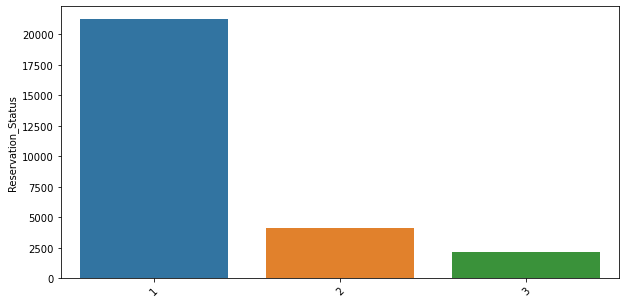

In [43]:
# 'Check-In':1,'Canceled':2,'No-Show':3

cat_num = train['Reservation_Status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [44]:
# Extracting the Year Month Date
train['Booking_date_Year']=train["Booking_date"].apply(lambda x:x.year)
train['Booking_date_month']=train["Booking_date"].apply(lambda x:x.month)
train['Booking_date_day']=train["Booking_date"].apply(lambda x:x.day)

train['Ex_checkin_Year']=train["Expected_checkin"].apply(lambda x:x.year)
train['Ex_checkin_month']=train["Expected_checkin"].apply(lambda x:x.month)
train['Ex_checkin_day']=train["Expected_checkin"].apply(lambda x:x.day)

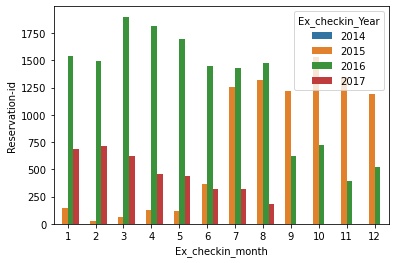

In [45]:
# No of expected checkins vs month and year
t=train.groupby(['Ex_checkin_Year','Ex_checkin_month'])[['Reservation-id']].count().reset_index()
plot = sn.barplot(x=t['Ex_checkin_month'], y=t["Reservation-id"],hue=t['Ex_checkin_Year'])
plt.show()

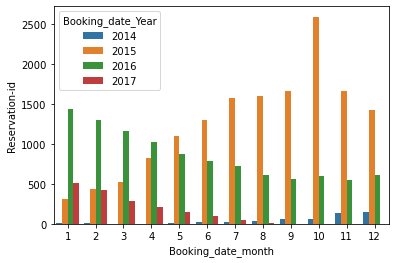

In [46]:
#No of reservations vs month and year
t=train.groupby(['Booking_date_Year','Booking_date_month'])[['Reservation-id']].count().reset_index()
plot = sn.barplot(x=t['Booking_date_month'], y=t["Reservation-id"],hue=t['Booking_date_Year'])
plt.show()

C:\Users\kpimb\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


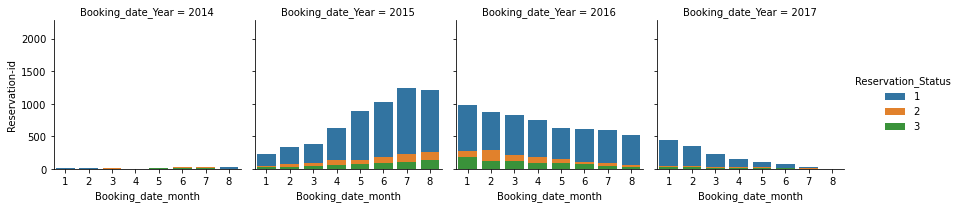

In [47]:
# Behaviour of reservations bookings vs reservation status vs month and year
t=train.groupby(['Booking_date_Year','Booking_date_month',"Reservation_Status"])[['Reservation-id']].count().reset_index()
g = sn.FacetGrid(t, col="Booking_date_Year",hue='Reservation_Status')
g.map(sn.barplot,'Booking_date_month','Reservation-id')
g.add_legend()

# Feature Selection

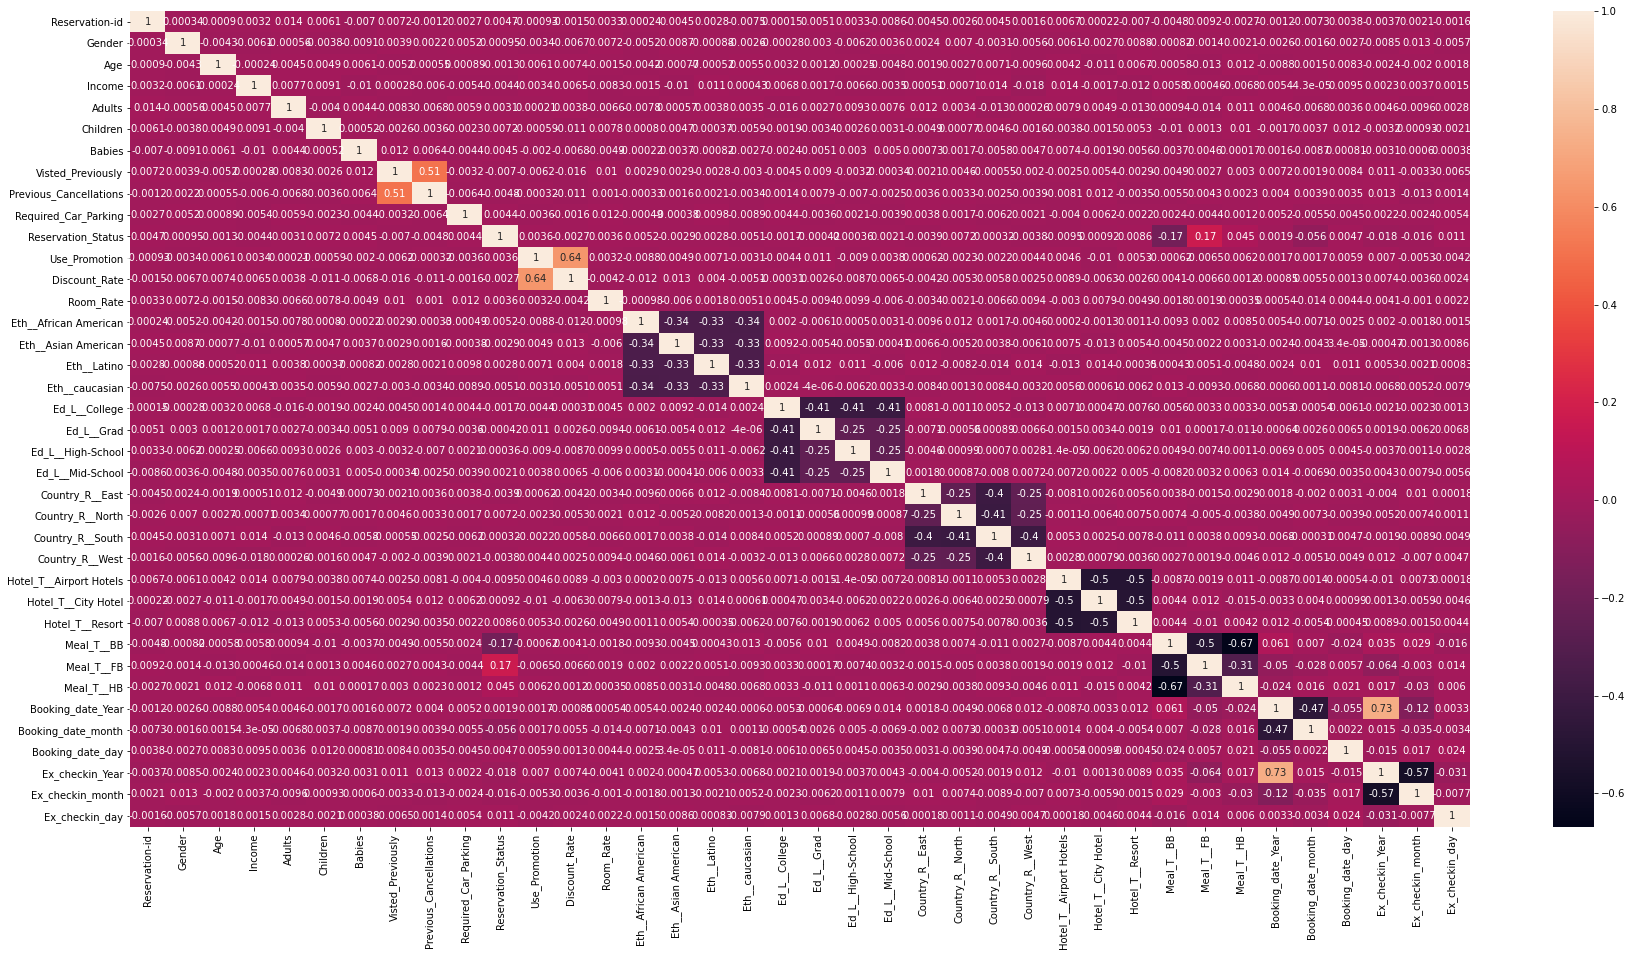

In [48]:
# Correlation matrix
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [49]:
# Correlation Values
corrMatrix.Reservation_Status.sort_values()

Meal_T__BB                -0.173065
Booking_date_month        -0.055535
Ex_checkin_Year           -0.018034
Ex_checkin_month          -0.015702
Hotel_T__Airport Hotels   -0.009484
Visted_Previously         -0.007038
Eth__caucasian            -0.005080
Previous_Cancellations    -0.004780
Income                    -0.004443
Country_R__East           -0.003865
Country_R__West           -0.003801
Eth__Asian American       -0.002890
Discount_Rate             -0.002705
Ed_L__College             -0.001663
Age                       -0.001303
Ed_L__Grad                -0.000420
Country_R__South           0.000317
Ed_L__High-School          0.000365
Hotel_T__City Hotel        0.000917
Gender                     0.000950
Booking_date_Year          0.001893
Ed_L__Mid-School           0.002095
Eth__Latino                0.002778
Adults                     0.003079
Room_Rate                  0.003621
Use_Promotion              0.003622
Required_Car_Parking       0.004444
Babies                     0

In [50]:
# Calculating the No of reservation days
train["Expected_Checking_days"]=train["Expected_checkout"]-train["Expected_checkin"]
train["Expected_Checking_days"]=train["Expected_Checking_days"].apply(lambda x:x.days)

In [51]:
del train['Ex_checkin_Year']
del train['Ex_checkin_month']
del train['Ex_checkin_day']

del train['Booking_date_Year']
del train['Booking_date_month']
del train['Booking_date_day']

In [54]:
# Extracing a new feature - weekday or weekend
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0

train['week_end/day']=train["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
train['week_end/day']=train['week_end/day'].apply(lambda x :week_end_day(x))

In [55]:
train.head()

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Expected_Checking_days,week_end/day
0,39428300,1,1,1,2015-07-01,2015-07-02,2015-05-21,2,2,0,0,0,1,1,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,77491756,1,2,3,2015-07-01,2015-07-02,2015-05-26,3,3,0,0,0,1,1,0,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
2,73747291,1,1,1,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,4,0
3,67301739,0,0,4,2015-07-02,2015-07-03,2015-06-20,4,3,0,0,0,1,1,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,77222321,1,3,2,2015-07-03,2015-07-04,2015-06-20,1,1,0,0,0,0,1,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1


In [56]:
# moving column to the last
train = train[[c for c in train if c not in ['Reservation_Status']] + ['Reservation_Status']]

In [57]:
# Extracting the top features
corrMatrix = train.corr()
feature_columns=corrMatrix[(corrMatrix.Reservation_Status>=0.004) | (corrMatrix.Reservation_Status<=-0.004)].Reservation_Status.reset_index()
print(feature_columns)

                      index  Reservation_Status
0            Reservation-id            0.004722
1                    Income           -0.004443
2                  Children            0.007180
3                    Babies            0.004473
4         Visted_Previously           -0.007038
5    Previous_Cancellations           -0.004780
6      Required_Car_Parking            0.004444
7     Eth__African American            0.005178
8            Eth__caucasian           -0.005080
9          Country_R__North            0.007173
10  Hotel_T__Airport Hotels           -0.009484
11          Hotel_T__Resort            0.008606
12               Meal_T__BB           -0.173065
13               Meal_T__FB            0.168576
14               Meal_T__HB            0.044998
15             week_end/day            0.033491
16       Reservation_Status            1.000000


# Preprocessing Validation dataset & Tests dataset

In [59]:
validation = encoding(validation,True)
test = encoding(test,False)

In [62]:
test.head()

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB
0,62931593,1,52,2,11/18/2016,11/19/2016,10/28/2016,3,3,0,0,0,1,1,10,153,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,70586099,1,47,2,11/18/2016,11/19/2016,8/6/2016,2,1,0,0,0,0,0,0,210,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,4230648,1,28,1,4/28/2017,5/1/2017,4/8/2017,2,2,0,0,0,0,1,5,117,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,25192322,1,65,2,11/18/2016,11/20/2016,5/20/2016,1,3,2,0,0,1,1,10,107,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4,80931528,0,45,2,11/18/2016,11/20/2016,10/31/2016,3,1,0,0,0,0,0,0,119,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Reservation-id           4318 non-null   int64 
 1   Gender                   4318 non-null   int64 
 2   Age                      4318 non-null   int64 
 3   Income                   4318 non-null   int64 
 4   Expected_checkin         4318 non-null   object
 5   Expected_checkout        4318 non-null   object
 6   Booking_date             4318 non-null   object
 7   Adults                   4318 non-null   int64 
 8   Children                 4318 non-null   int64 
 9   Babies                   4318 non-null   int64 
 10  Visted_Previously        4318 non-null   int64 
 11  Previous_Cancellations   4318 non-null   int64 
 12  Required_Car_Parking     4318 non-null   int64 
 13  Use_Promotion            4318 non-null   int64 
 14  Discount_Rate            4318 non-null  

In [66]:
def convert_date(data):
    data["Expected_checkin"]=data["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
    data["Expected_checkout"]=data["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
    data["Booking_date"]=data["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
    return data

In [67]:
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0

test = convert_date(test)
test['week_end/day']=test["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
test['week_end/day']=test['week_end/day'].apply(lambda x :week_end_day(x))

In [68]:
def week_end_day(num):
    week_end=[4,5,6]
    if num in week_end:
        return 1
    else:
        return 0
validation = convert_date(validation)
validation['week_end/day']=validation["Expected_checkin"].apply(lambda x:x.to_pydatetime().weekday())
validation['week_end/day']=validation['week_end/day'].apply(lambda x :week_end_day(x))

In [77]:
test

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,week_end/day
0,62931593,1,52,2,2016-11-18,2016-11-19,2016-10-28,3,3,0,0,0,1,1,10,153,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1
1,70586099,1,47,2,2016-11-18,2016-11-19,2016-08-06,2,1,0,0,0,0,0,0,210,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
2,4230648,1,28,1,2017-04-28,2017-05-01,2017-04-08,2,2,0,0,0,0,1,5,117,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1
3,25192322,1,65,2,2016-11-18,2016-11-20,2016-05-20,1,3,2,0,0,1,1,10,107,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,80931528,0,45,2,2016-11-18,2016-11-20,2016-10-31,3,1,0,0,0,0,0,0,119,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,0,53,3,2017-03-29,2017-03-30,2016-09-11,3,3,1,1,0,1,0,0,153,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4314,5496554,1,63,3,2017-03-29,2017-04-01,2017-02-10,3,3,0,0,0,1,1,40,233,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4315,59004046,1,59,1,2017-03-29,2017-03-30,2016-08-26,2,3,0,0,0,1,0,0,242,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4316,65838682,0,43,2,2017-03-29,2017-03-30,2017-03-04,4,2,1,0,0,1,0,0,208,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [75]:
feature_column_names = list(feature_columns['index'])
final_train=train[feature_column_names]
final_validation=validation[feature_column_names]
final_test=test[[i for i in feature_column_names if i!="Reservation_Status"]]

In [81]:
validation["Expected_Checking_days"]=validation["Expected_checkout"]-validation["Expected_checkin"]
validation["Expected_Checking_days"]=validation["Expected_Checking_days"].apply(lambda x:x.days)
test["Expected_Checking_days"]=test["Expected_checkout"]-test["Expected_checkin"]
test["Expected_Checking_days"]=test["Expected_Checking_days"].apply(lambda x:x.days)

In [82]:
validation_full = validation[train.columns]
test_full = test[[i for i in train.columns if i!="Reservation_Status"]]

# Writing dataset

In [83]:
final_train.to_csv('Preprocessed/Final_train.csv',header=True,index=False)
final_test.to_csv('Preprocessed/Final_test.csv',header=True,index=False)
final_validation.to_csv('Preprocessed/Final_validation.csv',header=True,index=False)

In [86]:
train.to_csv('Preprocessed Full/Final_train_full.csv',header=True,index=False)
test_full.to_csv('Preprocessed Full/Final_test_full.csv',header=True,index=False)
validation_full.to_csv('Preprocessed Full/Final_validation_full.csv',header=True,index=False)